Import libraries and input images

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

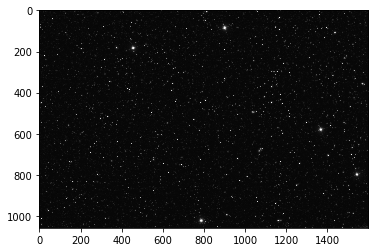

In [2]:
img0 = cv2.imread('starmap.png', cv2.IMREAD_GRAYSCALE)
thresh0 = cv2.threshold(img0, 30, 255, cv2.THRESH_BINARY)[1]

plt.imshow(img0, interpolation='nearest', cmap='gray')

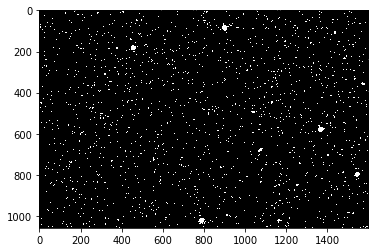

In [3]:
plt.imshow(thresh0, interpolation='nearest', cmap='gray')

In [4]:
img = cv2.imread('Small_area.png', cv2.IMREAD_GRAYSCALE)
thresh = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)[1]

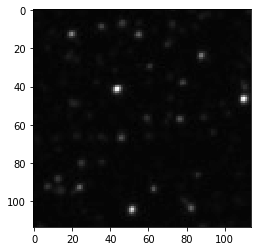

In [5]:
plt.imshow(img, interpolation='nearest', cmap='gray')

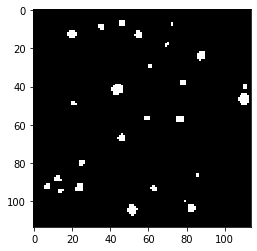

In [6]:
plt.imshow(thresh, interpolation='nearest', cmap='gray')

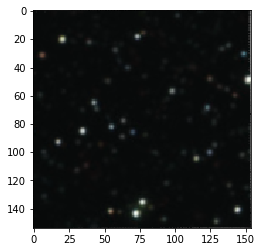

In [23]:
img_rotated = cv2.imread('Small_area_rotated.png')
plt.imshow(img_rotated)

In [39]:
for angle in np.arange(0, 360, 90):
    rotated = imutils.rotate_bound(img_rotated, angle)
    cv2.imshow("Rotated (Correct)", rotated)

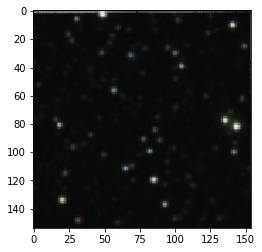

In [40]:
plt.imshow(rotated)

In [7]:
ret, mask = cv2.threshold(img, 100, 255, cv2.CV_8U)
#contours, hierarchy = cv2.findContours(mask,1,2 )
#contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
stars = []
stars_small_map=[]
stars_small_map_coordinates=[]
stars_small_map_radius=[]


for cnt in contours:
  area = cv2.contourArea(cnt)

  if area < 2:
    continue
  x, y, w, h = cv2.boundingRect(cnt)

  # 1. X-coordinate
  x_coord = x + w/2.0

  # 2. Y-coordinate
  y_coord = y + h/2.0

  # 3. brightness
  star_mask = np.zeros(img.shape,np.uint8)
  cv2.drawContours(star_mask, [cnt], 0, 255, -1)
  mean_val = cv2.mean(img, mask=star_mask)[0]
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img, mask=star_mask)
    
  # 4. radius
  radius = np.sqrt(area/(2*np.pi))
  stars.append({'x': x_coord,
                'y': y_coord,
                'mean_brightness': mean_val,
                'max_brightness': max_val,
                'radius': radius})

  stars_small_map.append({'x': x_coord,
                'radius': radius})
  
  stars_small_map_radius.append(radius)
  

In [8]:
stars_small_map_radius

[1.1283791670955126,
 1.6205112036071436,
 0.8462843753216345,
 1.0925484305920792,
 0.7463526651802308,
 0.7978845608028654,
 0.7463526651802308,
 0.9772050238058398,
 0.9772050238058398,
 0.5641895835477563,
 1.7841241161527712,
 0.5641895835477563,
 1.761681409986482,
 0.7978845608028654,
 1.2296226898414837,
 1.0171072362820548,
 1.2615662610100802,
 0.7463526651802308,
 0.7978845608028654]

In [9]:
len(stars)

19

In [10]:
stars_small_map

[{'x': 83.0, 'radius': 1.1283791670955126},
 {'x': 52.0, 'radius': 1.6205112036071436},
 {'x': 63.0, 'radius': 0.8462843753216345},
 {'x': 24.0, 'radius': 1.0925484305920792},
 {'x': 7.5, 'radius': 0.7463526651802308},
 {'x': 13.0, 'radius': 0.7978845608028654},
 {'x': 25.5, 'radius': 0.7463526651802308},
 {'x': 46.0, 'radius': 0.9772050238058398},
 {'x': 77.0, 'radius': 0.9772050238058398},
 {'x': 59.5, 'radius': 0.5641895835477563},
 {'x': 110.0, 'radius': 1.7841241161527712},
 {'x': 111.0, 'radius': 0.5641895835477563},
 {'x': 44.0, 'radius': 1.761681409986482},
 {'x': 78.5, 'radius': 0.7978845608028654},
 {'x': 88.0, 'radius': 1.2296226898414837},
 {'x': 55.0, 'radius': 1.0171072362820548},
 {'x': 20.5, 'radius': 1.2615662610100802},
 {'x': 35.5, 'radius': 0.7463526651802308},
 {'x': 46.5, 'radius': 0.7978845608028654}]

In [11]:
ret, mask = cv2.threshold(img, 100, 255, cv2.CV_8U)
#contours, hierarchy = cv2.findContours(mask,1,2 )
#contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
_, contours, hierarchy = cv2.findContours(thresh0, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
stars = []
stars_big_map=[]
stars_big_map_radius=[]
big_map_x_coord=[]


for cnt in contours:
  area = cv2.contourArea(cnt)

  if area < 2:
    continue
  x, y, w, h = cv2.boundingRect(cnt)

  # 1. X-coordinate
  x_coord = x + w/2.0

  # 2. Y-coordinate
  y_coord = y + h/2.0

  # 3. brightness
  star_mask = np.zeros(img.shape,np.uint8)
  cv2.drawContours(star_mask, [cnt], 0, 255, -1)
  mean_val = cv2.mean(img, mask=star_mask)[0]
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img, mask=star_mask)
    
  # 4. radius
  radius = np.sqrt(area/(2*np.pi))
  stars.append({'x': x_coord,
                'y': y_coord,
                'mean_brightness': mean_val,
                'max_brightness': max_val,
                'radius': radius})

  stars_big_map.append({'x': x_coord,'y': y_coord,
                'radius': radius})
  big_map_x_coord.append({'x': x_coord,
                'radius': radius})

  stars_big_map_radius.append(radius)
  

In [12]:
stars_big_map_radius

[0.5641895835477563,
 0.5641895835477563,
 3.2287224675588244,
 0.6307831305050401,
 0.9356025796273888,
 1.4104739588693906,
 1.2927207364566027,
 0.5641895835477563,
 1.5706373285785544,
 0.7463526651802308,
 0.5641895835477563,
 1.5191269449366247,
 0.8920620580763856,
 0.8920620580763856,
 1.6205112036071436,
 0.690988298942671,
 1.438406847937898,
 1.4104739588693906,
 0.690988298942671,
 0.5641895835477563,
 1.4104739588693906,
 0.690988298942671,
 1.0925484305920792,
 0.9356025796273888,
 0.6307831305050401,
 0.5641895835477563,
 1.4927053303604616,
 0.7463526651802308,
 0.9356025796273888,
 0.9356025796273888,
 1.6448811606198852,
 1.0171072362820548,
 1.1283791670955126,
 0.7978845608028654,
 1.5450968080927583,
 1.5191269449366247,
 1.0171072362820548,
 1.0925484305920792,
 1.913259964331453,
 1.196826841204298,
 0.7463526651802308,
 0.5641895835477563,
 1.0925484305920792,
 1.3231418571003069,
 1.6448811606198852,
 0.9772050238058398,
 1.4927053303604616,
 1.3528790949515024

list1 = [1, 2]
list2 = [1, 3]

list1_as_set = set(list1)
intersection = list1_as_set.intersection(list2)

intersection_as_list = list(intersection)

print(intersection_as_list)

In [13]:
stars_big_map_radius_as_set= set(stars_big_map_radius)

intersection = stars_big_map_radius_as_set.intersection(stars_small_map_radius)
intersection_as_list = list(intersection)
print(intersection_as_list)

[0.8462843753216345, 1.1283791670955126, 0.7463526651802308, 1.6205112036071436, 1.0925484305920792, 0.7978845608028654, 0.9772050238058398, 0.5641895835477563, 1.7841241161527712, 1.761681409986482, 1.2296226898414837, 1.0171072362820548, 1.2615662610100802]


In [14]:
len(intersection_as_list)

13

In [15]:
#stars_big_map.sort()
newlist = sorted(stars_big_map, key=lambda k: k['y']) 
print(newlist)

[{'x': 762.5, 'y': 1.5, 'radius': 0.7463526651802308}, {'x': 931.5, 'y': 2.5, 'radius': 0.7978845608028654}, {'x': 749.5, 'y': 2.5, 'radius': 0.7463526651802308}, {'x': 1155.0, 'y': 2.5, 'radius': 1.5450968080927583}, {'x': 593.0, 'y': 2.5, 'radius': 1.7159156293944244}, {'x': 58.5, 'y': 3.0, 'radius': 0.7978845608028654}, {'x': 1171.5, 'y': 3.0, 'radius': 1.913259964331453}, {'x': 1420.5, 'y': 4.0, 'radius': 1.6205112036071436}, {'x': 175.0, 'y': 5.5, 'radius': 1.828183197857863}, {'x': 1055.5, 'y': 5.5, 'radius': 3.166506184233564}, {'x': 347.5, 'y': 6.0, 'radius': 0.5641895835477563}, {'x': 909.0, 'y': 6.0, 'radius': 1.0171072362820548}, {'x': 123.5, 'y': 6.0, 'radius': 1.055502061411188}, {'x': 800.5, 'y': 6.5, 'radius': 1.5706373285785544}, {'x': 1313.5, 'y': 7.0, 'radius': 1.1631066229203195}, {'x': 1360.0, 'y': 8.0, 'radius': 1.0171072362820548}, {'x': 672.5, 'y': 8.0, 'radius': 1.2296226898414837}, {'x': 38.5, 'y': 8.5, 'radius': 0.7463526651802308}, {'x': 1508.0, 'y': 8.5, 'ra

In [16]:
stars_small_map_radius

[1.1283791670955126,
 1.6205112036071436,
 0.8462843753216345,
 1.0925484305920792,
 0.7463526651802308,
 0.7978845608028654,
 0.7463526651802308,
 0.9772050238058398,
 0.9772050238058398,
 0.5641895835477563,
 1.7841241161527712,
 0.5641895835477563,
 1.761681409986482,
 0.7978845608028654,
 1.2296226898414837,
 1.0171072362820548,
 1.2615662610100802,
 0.7463526651802308,
 0.7978845608028654]

In [17]:
type(stars_big_map)

list

In [18]:
intersection_as_list

[0.8462843753216345,
 1.1283791670955126,
 0.7463526651802308,
 1.6205112036071436,
 1.0925484305920792,
 0.7978845608028654,
 0.9772050238058398,
 0.5641895835477563,
 1.7841241161527712,
 1.761681409986482,
 1.2296226898414837,
 1.0171072362820548,
 1.2615662610100802]

In [19]:
intersection_as_list = sorted(intersection_as_list) 
print(intersection_as_list)

[0.5641895835477563, 0.7463526651802308, 0.7978845608028654, 0.8462843753216345, 0.9772050238058398, 1.0171072362820548, 1.0925484305920792, 1.1283791670955126, 1.2296226898414837, 1.2615662610100802, 1.6205112036071436, 1.761681409986482, 1.7841241161527712]


In [20]:
xmax,xmin,ymax, ymin

NameError: name 'xmax' is not defined

In [21]:
1.7841241161527712 xmax=776 y= 700
1.761681409986482  xmax=1068 y= 711
1.6205112036071436 xmax=764 y= 771

SyntaxError: invalid syntax (<ipython-input-21-88ecf967070b>, line 1)

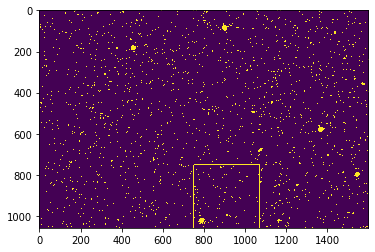

In [22]:
image =cv2.rectangle(thresh0, (750,750), (1070,1070), (255,255,255), 2)
plt.imshow(image)